In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer

In [3]:
df=pd.read_csv(r"C:\Users\singh\Downloads\Dataset\Dataset\Weather\Weather.csv")

In [4]:
df.shape

(47809, 11)

In [5]:
df.dtypes

%time        float64
AbsHumOut    float64
Iglob        float64
PARout       float64
Pyrgeo       float64
RadSum       float64
Rain         float64
Rhout        float64
Tout         float64
Winddir      float64
Windsp       float64
dtype: object

In [6]:
df.nunique()

%time        47809
AbsHumOut    43624
Iglob        14438
PARout       16815
Pyrgeo        5889
RadSum       12744
Rain            10
Rhout        15895
Tout          3871
Winddir        186
Windsp        4274
dtype: int64

In [7]:
#View the data
df.head()

,%time,AbsHumOut,Iglob,PARout,Pyrgeo,RadSum,Rain,Rhout,Tout,Winddir,Windsp
0,43815.00000,6.220954,0.0,0.0,-72.0,215.0,0.0,80.6,6.9,32.0,4.7
1,43815.00347,6.220954,0.0,0.0,-73.0,0.0,0.0,80.6,6.9,32.0,4.7
2,43815.00694,6.205565,0.0,0.0,-76.0,0.0,0.0,80.4,6.9,32.0,4.7
3,43815.01042,6.190173,0.0,0.0,-77.0,0.0,0.0,80.2,6.9,32.0,4.7
4,43815.01389,6.162624,0.0,0.0,-75.0,0.0,0.0,80.9,6.7,32.0,4.7


In [8]:
df.columns

Index(['%time', 'AbsHumOut', 'Iglob', 'PARout', 'Pyrgeo', 'RadSum', 'Rain',
       'Rhout', 'Tout', 'Winddir', 'Windsp'],
      dtype='object')

In [9]:
#Basic information
df.info()
#Describe the data
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47809 entries, 0 to 47808
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   %time      47809 non-null  float64
 1   AbsHumOut  47738 non-null  float64
 2   Iglob      47738 non-null  float64
 3   PARout     47738 non-null  float64
 4   Pyrgeo     47738 non-null  float64
 5   RadSum     47738 non-null  float64
 6   Rain       47738 non-null  float64
 7   Rhout      47738 non-null  float64
 8   Tout       47738 non-null  float64
 9   Winddir    47738 non-null  float64
 10  Windsp     47738 non-null  float64
dtypes: float64(11)
memory usage: 4.0 MB


,%time,AbsHumOut,Iglob,PARout,Pyrgeo,RadSum,Rain,Rhout,Tout,Winddir,Windsp
count,47809.000000,47738.000000,47738.000000,47738.000000,47738.000000,47738.000000,47738.000000,47738.000000,47738.000000,47738.000000,47738.000000
mean,43898.000000,6.569647,125.296703,250.270026,-52.871381,477.410229,0.052579,74.847942,9.025341,28.636369,4.982486
std,47.921576,1.733592,222.006296,443.856662,36.340826,724.258902,0.223193,19.873991,4.229593,26.860777,3.849020
min,43815.000000,0.879099,0.000000,0.000000,-136.000000,0.000000,0.000000,10.100003,-0.200000,1.000000,0.000000
25%,43856.500000,5.446391,0.000000,0.000000,-84.000000,0.000000,0.000000,61.700000,6.300000,4.000000,2.200000
50%,43898.000000,6.568635,0.000000,1.000000,-54.000000,122.000000,0.000000,79.300000,8.400000,32.000000,4.200000
75%,43939.500000,7.701009,146.000002,287.000000,-17.000000,613.000000,0.000000,91.275000,11.000000,32.000004,7.100000
max,43981.000000,12.427134,1505.000000,2010.000000,0.000000,2999.000000,1.000000,99.700000,27.300000,128.000000,21.900000


In [10]:
#Find the duplicates
df.duplicated().sum()

0

In [13]:
#Find NaN values
df.isna().sum()

%time        0
AbsHumOut    0
Iglob        0
PARout       0
Pyrgeo       0
RadSum       0
Rain         0
Rhout        0
Tout         0
Winddir      0
Windsp       0
dtype: int64

In [18]:
#renaming
df.rename(columns={'%time': 'Time'}, inplace=True)
df.head()

,Time,AbsHumOut,Iglob,PARout,Pyrgeo,RadSum,Rain,Rhout,Tout,Winddir,Windsp
0,43815.00000,6.220954,0.0,0.0,-72.0,215.0,0.0,80.6,6.9,32.0,4.7
1,43815.00347,6.220954,0.0,0.0,-73.0,0.0,0.0,80.6,6.9,32.0,4.7
2,43815.00694,6.205565,0.0,0.0,-76.0,0.0,0.0,80.4,6.9,32.0,4.7
3,43815.01042,6.190173,0.0,0.0,-77.0,0.0,0.0,80.2,6.9,32.0,4.7
4,43815.01389,6.162624,0.0,0.0,-75.0,0.0,0.0,80.9,6.7,32.0,4.7


In [20]:
#changing time format
df['Time'] = pd.to_datetime(df['Time'], unit='D', origin='1899-12-30')

In [21]:
df.head()

,Time,AbsHumOut,Iglob,PARout,Pyrgeo,RadSum,Rain,Rhout,Tout,Winddir,Windsp
0,2019-12-16 00:00:00.000000000,6.220954,0.0,0.0,-72.0,215.0,0.0,80.6,6.9,32.0,4.7
1,2019-12-16 00:04:59.808000256,6.220954,0.0,0.0,-73.0,0.0,0.0,80.6,6.9,32.0,4.7
2,2019-12-16 00:09:59.616000000,6.205565,0.0,0.0,-76.0,0.0,0.0,80.4,6.9,32.0,4.7
3,2019-12-16 00:15:00.288000000,6.190173,0.0,0.0,-77.0,0.0,0.0,80.2,6.9,32.0,4.7
4,2019-12-16 00:20:00.096000256,6.162624,0.0,0.0,-75.0,0.0,0.0,80.9,6.7,32.0,4.7


<ipython-input-22-32d0462205e7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot:>

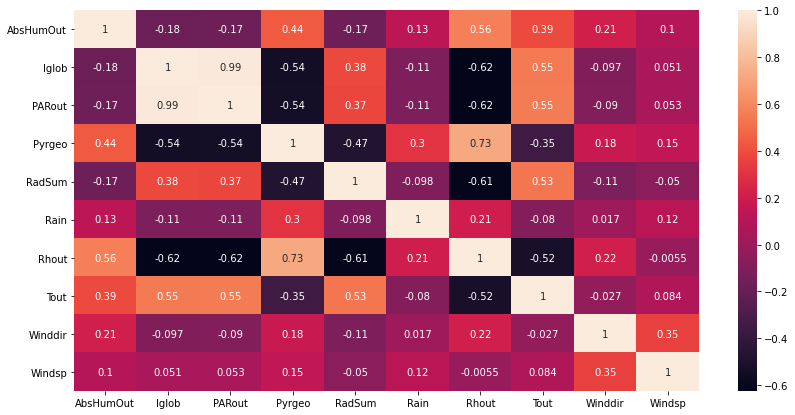

In [22]:
#correlation
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(), annot=True)

In [23]:
correlations = df.corr()
cols = correlations
for i in cols:
    for j in cols:
         if i!=j and abs(correlations.loc[i, j])>= 0.6:
            print(f"{i} and {j} correlated with value {correlations.loc[i, j]}")

Iglob and PARout correlated with value 0.9897548185102766
Iglob and Rhout correlated with value -0.6238039876931148
PARout and Iglob correlated with value 0.9897548185102766
PARout and Rhout correlated with value -0.617752308824284
Pyrgeo and Rhout correlated with value 0.7262064030858989
RadSum and Rhout correlated with value -0.6079771673237899
Rhout and Iglob correlated with value -0.6238039876931148
Rhout and PARout correlated with value -0.617752308824284
Rhout and Pyrgeo correlated with value 0.7262064030858989
Rhout and RadSum correlated with value -0.6079771673237899


<ipython-input-23-bc43432ecd2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


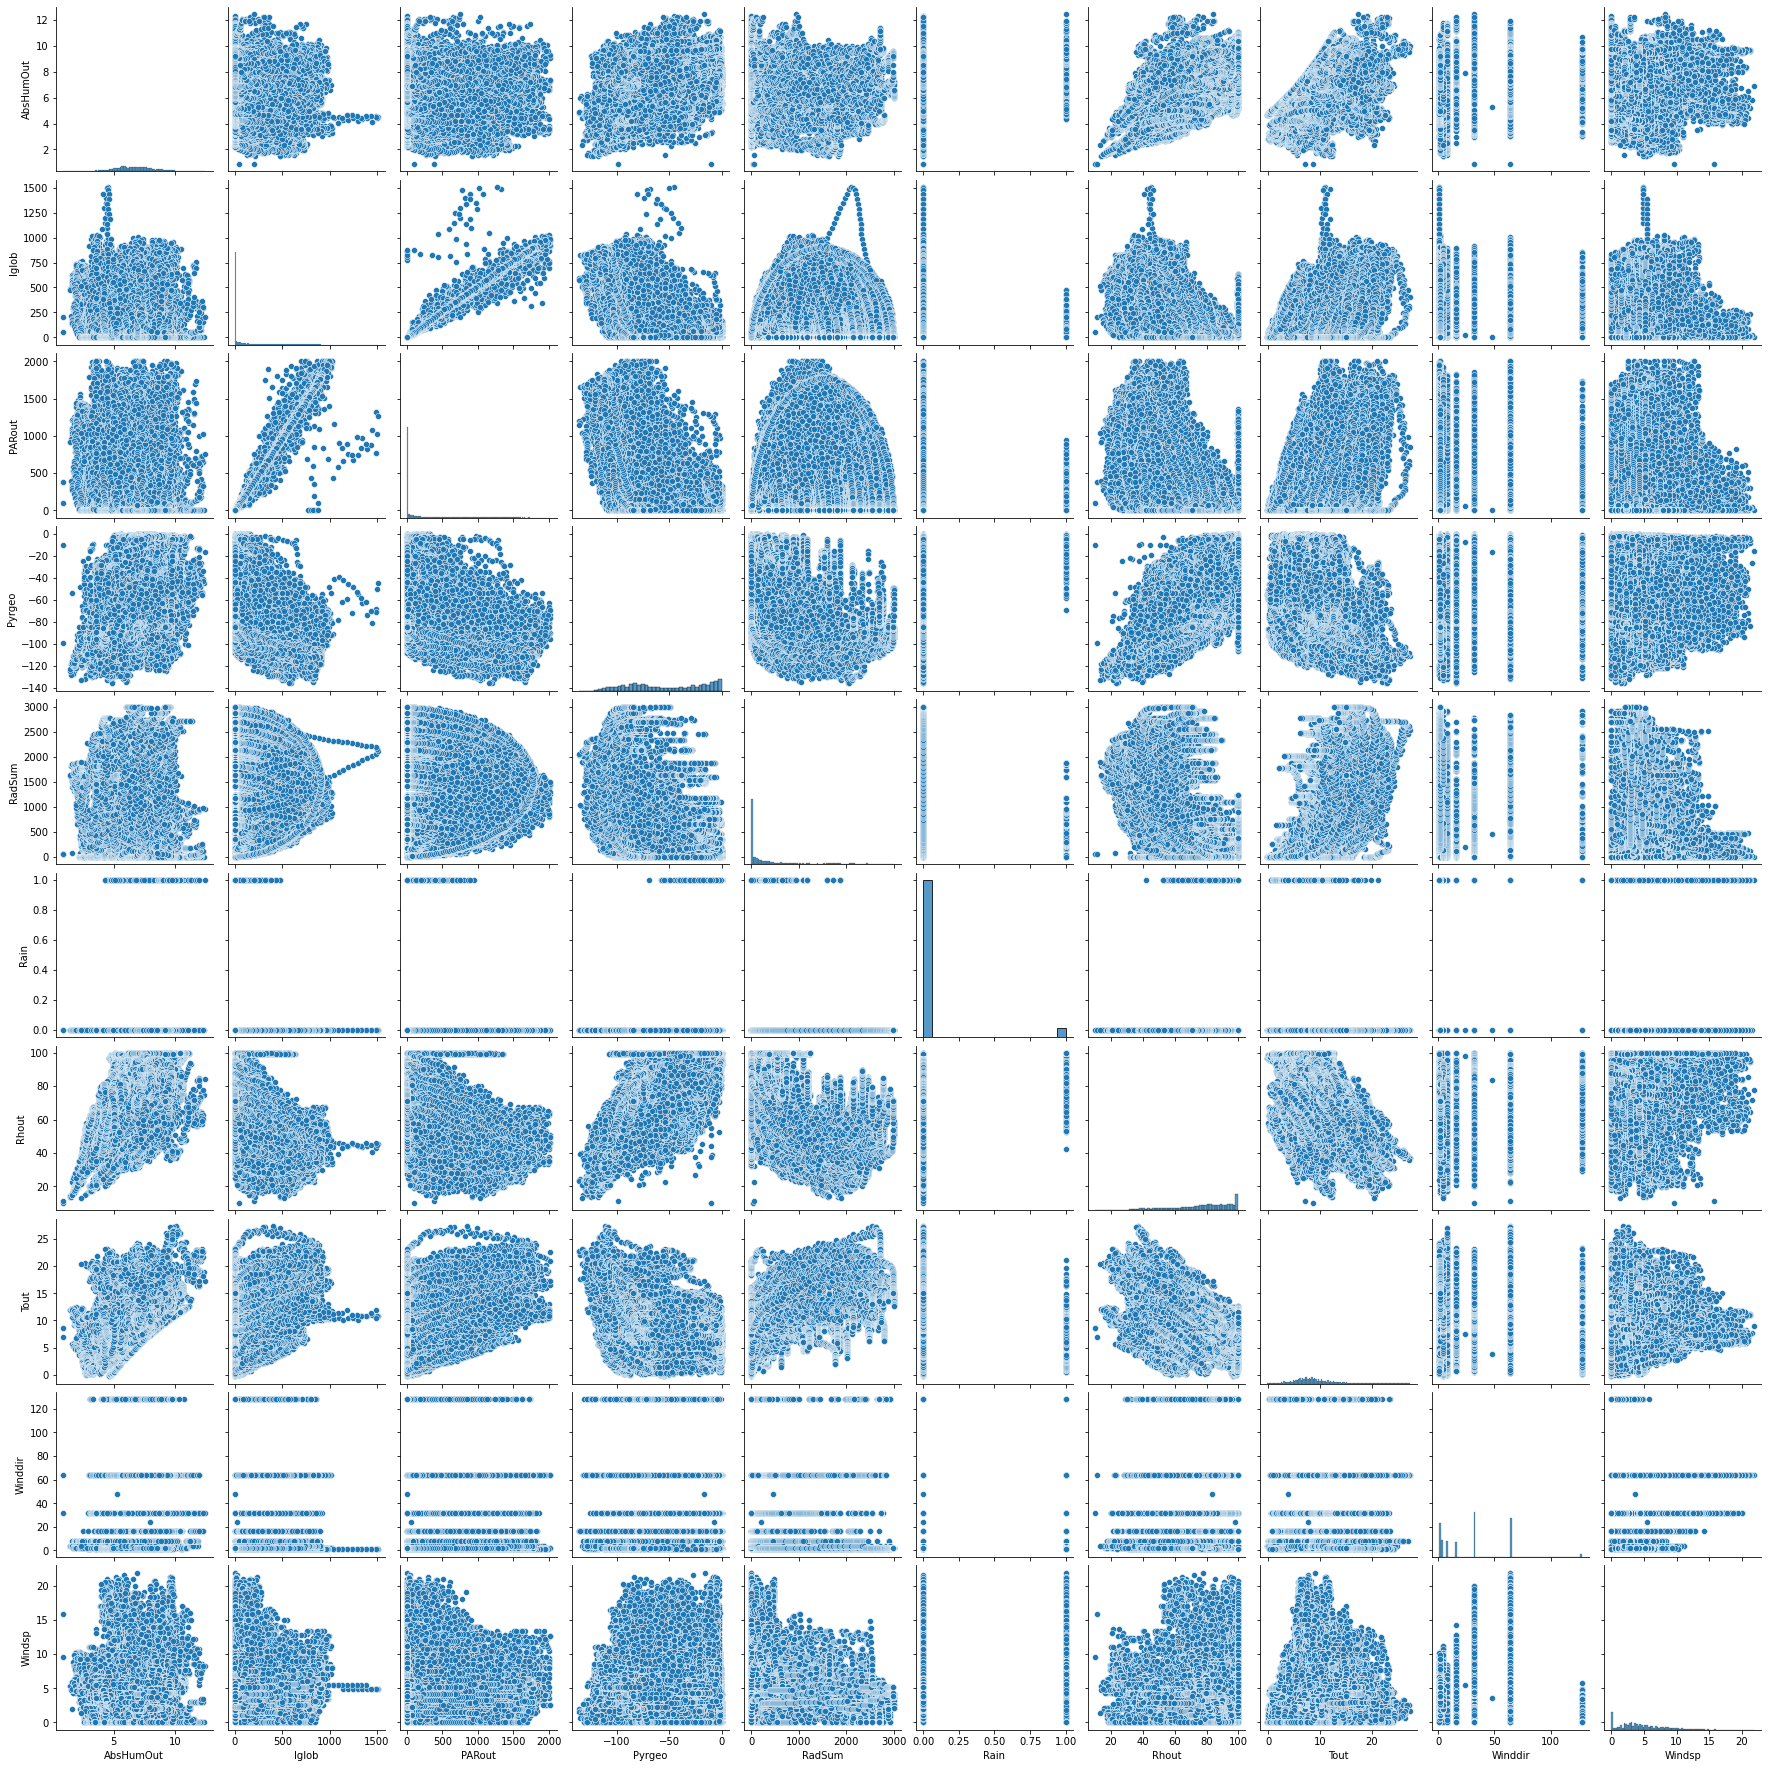

In [24]:
sns.pairplot(df)

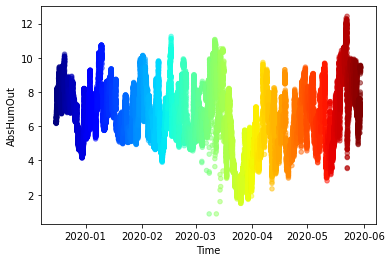

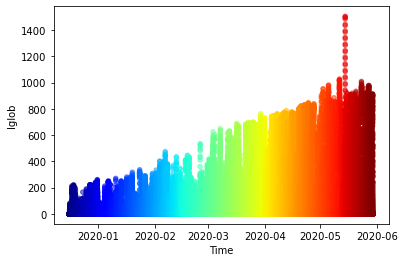

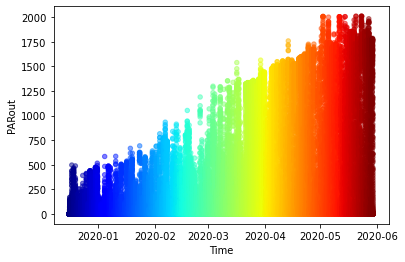

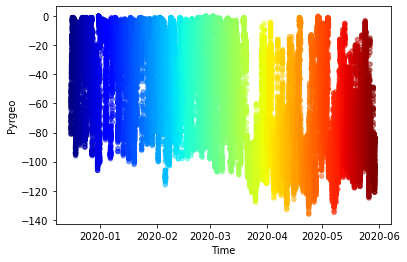

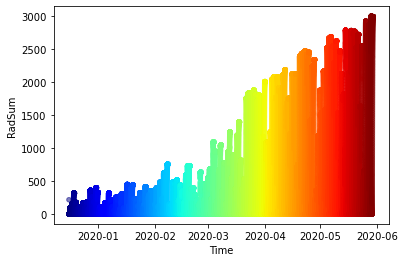

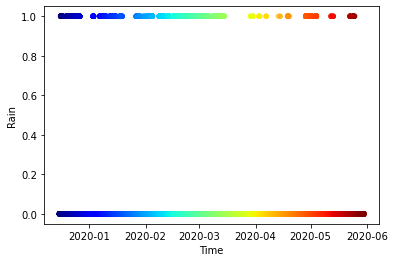

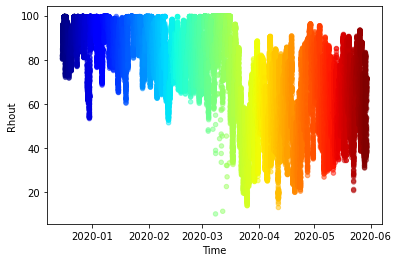

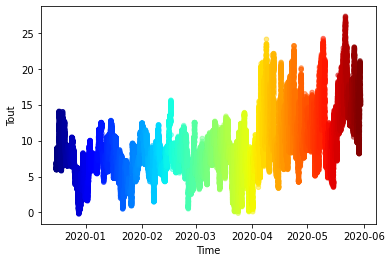

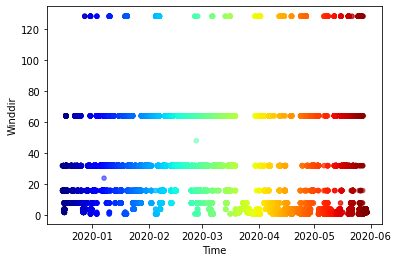

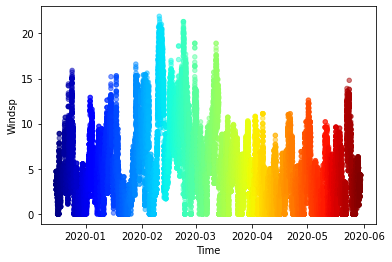

In [25]:
#scatter plot with respect to time 
columns=['AbsHumOut', 'Iglob', 'PARout', 'Pyrgeo', 'RadSum', 'Rain','Rhout', 'Tout', 'Winddir', 'Windsp']
for i in columns:
    df.plot(kind='scatter',x='Time', y=i, alpha=0.5, c='Time',cmap=plt.get_cmap("jet"))